#Importation des librairies

In [1]:
# Install TensorFlow and other necessary packages
!pip install tensorflow

In [2]:
!pip install autogluon

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, Add, Flatten
from tensorflow.keras.optimizers import Adam

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from autogluon.tabular import TabularPredictor

from google.colab import drive

In [8]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jun 15 09:46:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# GitHub

In [12]:
file_path = '/content/drive/MyDrive/00_CAS_Project/Git_token.txt'

# Step 3: Read the file and store its content in a variable
with open(file_path, 'r') as file:
    token = file.read().strip()

In [ ]:
username = 'SimRime'
repository = 'CAS-Final-Project_Simon-Rime'

!git clone https://{token}@github.com/{username}/{repository}

del token

Cloning into 'CAS-Final-Project_Simon-Rime'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (36/36), done.


## Add Notebook

In [ ]:
# Copy the updated notebook from Google Drive to the specific directory
!cp /content/drive/MyDrive/00_CAS_Project/Substations.ipynb /content/CAS-Final-Project_Simon-Rime/Google_Colab_notebook/

# Change to the repository directory
%cd /content/CAS-Final-Project_Simon-Rime

# Set Git user identity (only needed once)
!git config --global user.email "rimesimon@gmail.com"
!git config --global user.name "SimRime"

# Pull the latest changes from the remote repository
!git pull origin main  # Use 'main' or 'master' based on your repository's default branch

# Add the updated notebook file to the Git index
!git add Google_Colab_notebook/Substations.ipynb

# Commit the changes
!git commit -m "Added Substations notebook"

# Push the changes to the remote repository
!git push -u origin main  # Use 'main' or 'master' based on your repository's default branch

/content/CAS-Final-Project_Simon-Rime
From https://github.com/SimRime/CAS-Final-Project_Simon-Rime
 * branch            main       -> FETCH_HEAD
Already up to date.
[main 7c119f0] Added Substations notebook
 1 file changed, 1 insertion(+)
 create mode 100644 Google_Colab_notebook/Substations.ipynb
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 916.65 KiB | 6.24 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/SimRime/CAS-Final-Project_Simon-Rime
   c464107..7c119f0  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


## Update Notebook

In [ ]:
# Copy the updated notebook from Google Drive to the specific directory
!cp /content/drive/MyDrive/00_CAS_Project/Substations.ipynb /content/CAS-Final-Project_Simon-Rime/Google_Colab_notebook/

# Change to the repository directory
%cd /content/CAS-Final-Project_Simon-Rime

# Add the updated notebook file to the Git index
!git add Google_Colab_notebook/Substations.ipynb

# Commit the changes
!git commit -m "Added HMM model, Added mapping of df and final comparison between the model, DTW is used for further analysis"

# Pull the latest changes from the remote repository with rebase
!git pull origin main --rebase  # Use 'main' or 'master' based on your repository's default branch

# Push the changes to the remote repository
!git push -u origin main  # Use 'main' or 'master' based on your repository's default branch

/content/CAS-Final-Project_Simon-Rime
[main 7aa8929] Added HMM model, Added mapping of df and final comparison between the model, DTW is used for further analysis
 1 file changed, 1 insertion(+), 1 deletion(-)
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 1), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (4/4), 3.50 MiB | 10.05 MiB/s, done.
From https://github.com/SimRime/CAS-Final-Project_Simon-Rime
 * branch            main       -> FETCH_HEAD
   965253e..32c4599  main       -> origin/main
Successfully rebased and updated refs/heads/main.
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.92 MiB | 6.03 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https:

# Data importation and preparation

##Import the data

In [ ]:
# Define the file path and load the CSV file
Clean_Dataset_directory = '/content/drive/MyDrive/00_CAS_Project/Clean_Dataset'
Power_plant_file = os.path.join(Clean_Dataset_directory, 'Power_plant_data_full.csv')

Power_plant = pd.read_csv(Power_plant_file)

In [ ]:
Power_plant.head()

## Data preparation

In [ ]:
# Drop rows with missing values
Power_plant.dropna(inplace=True)

# Time Series Analysis
Power_plant['Time Stamp'] = pd.to_datetime(Power_plant['Time Stamp'])
Power_plant.set_index('Time Stamp', inplace=True)

In [ ]:
plot_cols = ['DryBulbTemperature', 'ALLSKY_SFC_SW_DWN', 'PRECTOTCORR']
plot_features = Power_plant[plot_cols]
_ = plot_features.plot(subplots=True)

plot_features = Power_plant[plot_cols][:480]
_ = plot_features.plot(subplots=True)

Divide the cluster by the total power installed for each Timestamp

In [ ]:
# Sum of Cluster columns
cluster_columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
Power_plant['Total'] = Power_plant[cluster_columns].sum(axis=1)

# Normalize each cluster column
for column in cluster_columns:
    Power_plant[column + ' Normalized'] = Power_plant[column] / Power_plant['Total']

# Drop the 'Total' column as it was only used for normalization
# Power_plant.drop(columns=['Total'], inplace=True)

## Training - Test - Validation dataset

In [ ]:
# List of columns to drop
columns_to_drop = [
    #'Time Stamp',
    'Puissance [kW]',
    'Température extérieure [°C]',
    'Supply T',
    'Return T',
    'Puissance [kW]_1',
    'T2M',
    'MO',
    'YEAR',
    'HR',
    'Cluster 0',
    'Cluster 1',
    'Cluster 2',
    'Cluster 3',
    'Cluster 4',
    'NormalizedPower'
]

# Drop the columns
Power_plant_train = Power_plant.drop(columns=columns_to_drop)

# Reset the index to a classic integer-based index
Power_plant_train = Power_plant_train.reset_index(drop=True)

Power_plant_train = Power_plant_train.dropna()

# Display the updated DataFrame to verify the operation
Power_plant_train.head()

,Power_tot,DryBulbTemperature,ALLSKY_SFC_SW_DWN,PRECTOTCORR,prev_hour,two_hours_before,three_hours_before,Wx,Wy,HR_sin,...,D_Week_sin,D_Week_cos,YR_sin,YR_cos,Total,Cluster 0 Normalized,Cluster 1 Normalized,Cluster 2 Normalized,Cluster 3 Normalized,Cluster 4 Normalized
0,2169.0,2.0,0.00,0.0,2225.0,2173.0,2009.0,-1.235487,1.000835,0.866025,...,0.974928,-0.222521,0.000717,1.000000,6115.0,0.099755,0.185609,0.018806,0.565822,0.130008
1,2419.0,2.1,0.00,0.0,2169.0,2225.0,2173.0,-1.589908,0.822370,0.965926,...,0.974928,-0.222521,0.001434,0.999999,6115.0,0.099755,0.185609,0.018806,0.565822,0.130008
2,2652.0,2.4,0.00,0.0,2419.0,2169.0,2225.0,-1.842937,0.851166,1.000000,...,0.974928,-0.222521,0.002150,0.999998,6115.0,0.099755,0.185609,0.018806,0.565822,0.130008
3,3078.0,2.3,0.00,0.0,2652.0,2419.0,2169.0,-1.965172,0.943662,0.965926,...,0.974928,-0.222521,0.002867,0.999996,6115.0,0.099755,0.185609,0.018806,0.565822,0.130008
4,3021.0,1.9,14.87,0.0,3078.0,2652.0,2419.0,-1.978462,1.071536,0.866025,...,0.974928,-0.222521,0.003584,0.999994,6115.0,0.099755,0.185609,0.018806,0.565822,0.130008


We use a `(70%, 20%, 10%)` split for the training, validation, and test sets. Note the data is **not** being randomly shuffled before splitting. This is for two reasons:

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [ ]:
# Apply log transformation to the feature with exponential distribution
Power_plant_train['PRECTOTCORR_log'] = np.log1p(Power_plant_train['PRECTOTCORR'])

Power_plant_train = Power_plant_train.drop(columns='PRECTOTCORR')
# Select columns to standardize
cols_to_standardize = ['Total','DryBulbTemperature', 'Wx',	'Wy', 'ALLSKY_SFC_SW_DWN', 'PRECTOTCORR_log','prev_hour', 'two_hours_before', 'three_hours_before']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
Power_plant_train[cols_to_standardize] = scaler.fit_transform(Power_plant_train[cols_to_standardize])

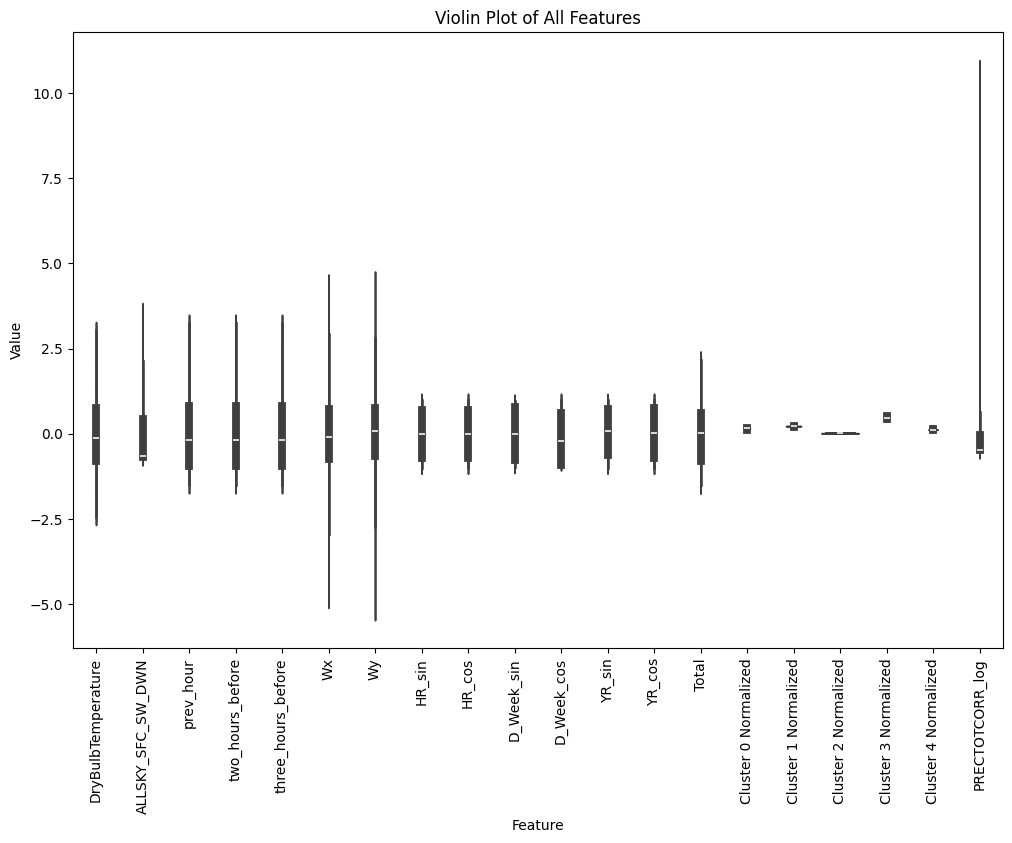

In [ ]:
# Melt the DataFrame to long format
data_melted = pd.melt(X.drop('Power_tot',axis=1), var_name='Feature', value_name='Value')

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Feature', y='Value', data=data_melted)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Violin Plot of All Features')
plt.show()

# Autogluon

In [ ]:
# Define the target and features
y = Power_plant_train['Power_tot']
X = Power_plant_train.drop(columns=['Power_tot'])  # Ensure to drop the target column

# Split the data into train and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Further split train into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Prepare DataFrames for AutoGluon
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [ ]:
# Initialize AutoGluon TabularPredictor
predictor = TabularPredictor(label='Power_tot', problem_type='regression').fit(train_data, tuning_data=val_data)

# Evaluate on test data
performance = predictor.evaluate(test_data)
print(performance)

# Make predictions
predictions = predictor.predict(X_test)
print(predictions)

No path specified. Models will be saved in: "AutogluonModels/ag-20240611_181140"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240611_181140"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
C

[1000]	valid_set's rmse: 136.579
[2000]	valid_set's rmse: 134.554
[3000]	valid_set's rmse: 134.031
[4000]	valid_set's rmse: 134.112


	-133.918	 = Validation score   (-root_mean_squared_error)
	13.04s	 = Training   runtime
	1.28s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 135.781
[2000]	valid_set's rmse: 134.764


	-134.6818	 = Validation score   (-root_mean_squared_error)
	7.54s	 = Training   runtime
	1.03s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-151.5557	 = Validation score   (-root_mean_squared_error)
	94.97s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: CatBoost ...
	-131.7707	 = Validation score   (-root_mean_squared_error)
	59.32s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-142.2493	 = Validation score   (-root_mean_squared_error)
	27.13s	 = Training   runtime
	0.52s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-141.258	 = Validation score   (-root_mean_squared_error)
	27.08s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: XGBoost ...
	-136.4597	 = Validation score   (-root_mean_squared_error)
	4.64s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-168.0307	 = Validation score   (-root_mean_squared_error)
	22.05s	 = Training   runtime
	0.03s	

[1000]	valid_set's rmse: 134.668


	-134.6569	 = Validation score   (-root_mean_squared_error)
	10.68s	 = Training   runtime
	0.93s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.435, 'LightGBMXT': 0.261, 'LightGBMLarge': 0.174, 'NeuralNetFastAI': 0.087, 'LightGBM': 0.043}
	-130.0353	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 279.89s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240611_181140")


{'root_mean_squared_error': -129.0950970591081, 'mean_squared_error': -16665.544084700537, 'mean_absolute_error': -91.0282653123098, 'r2': 0.9863519520045924, 'pearsonr': 0.9931568623497177, 'median_absolute_error': -70.337646484375}
20191     827.844055
32214     651.751770
21485     371.806305
70       1583.205444
34780    1997.327271
            ...     
1396     2620.243896
24378    1137.822632
9150     2995.704834
2081     2112.046875
10089    2344.388672
Name: Power_tot, Length: 3517, dtype: float32


In [ ]:
# Retrieve leaderboard
leaderboard = predictor.leaderboard(test_data, silent=True)

In [ ]:
# Print the columns of the leaderboard DataFrame
print("Available columns in leaderboard:")
print(leaderboard.columns)

Available columns in leaderboard:
Index(['model', 'score_test', 'score_val', 'eval_metric', 'pred_time_test',
       'pred_time_val', 'fit_time', 'pred_time_test_marginal',
       'pred_time_val_marginal', 'fit_time_marginal', 'stack_level',
       'can_infer', 'fit_order'],
      dtype='object')


<ipython-input-108-1cb0f0081a1f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score_Test', y='Model', data=metrics_df, palette='viridis')


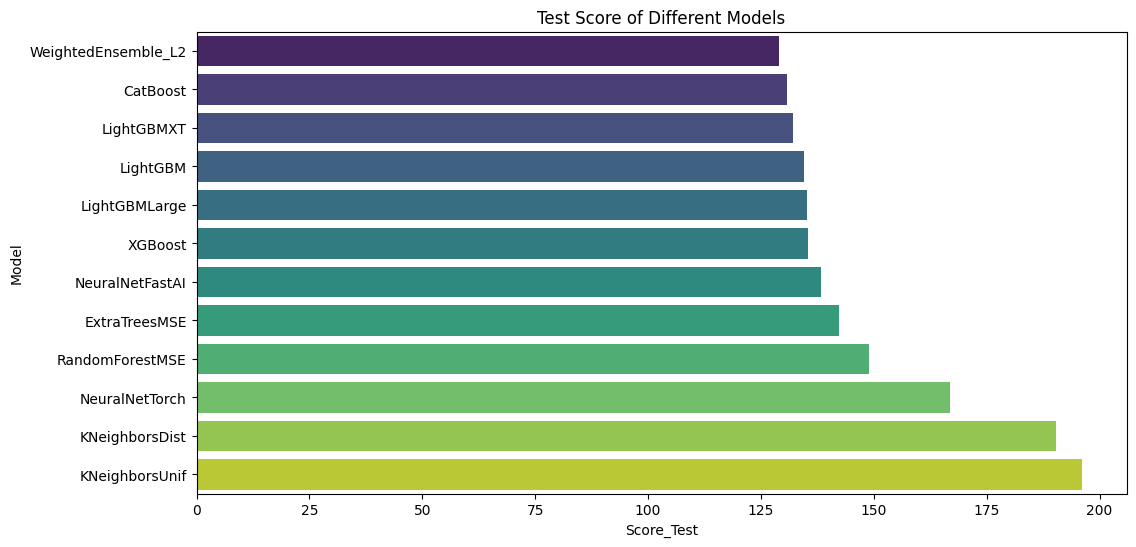

<ipython-input-108-1cb0f0081a1f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score_Val', y='Model', data=metrics_df, palette='viridis')


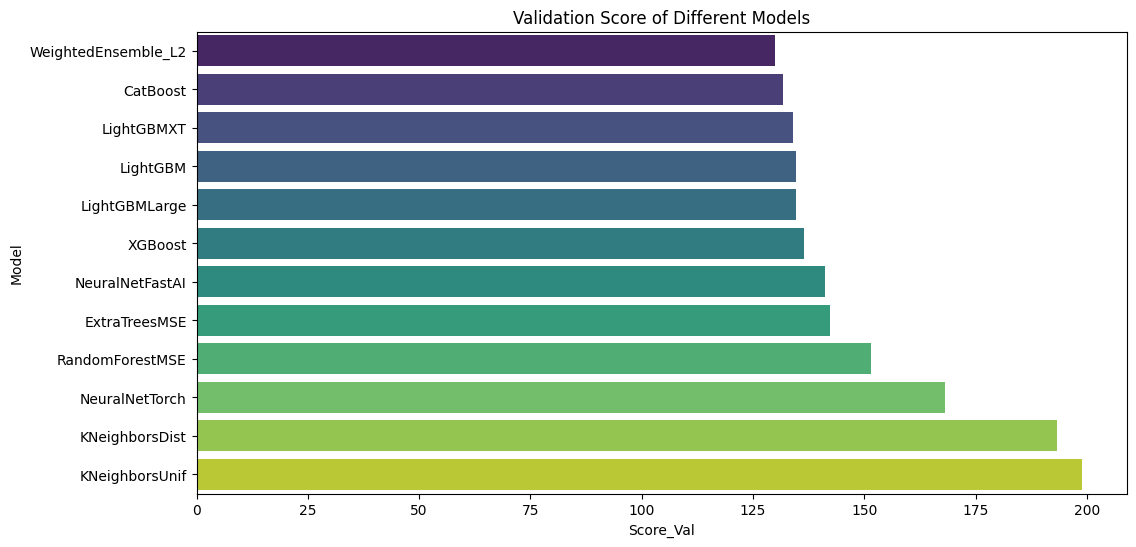

In [ ]:
# Collect the necessary performance metrics
models = leaderboard['model']
score_test = -leaderboard['score_test']  # Negating if lower is better
score_val = -leaderboard['score_val']  # Negating if lower is better

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'Score_Test': score_test,
    'Score_Val': score_val
})

# Plotting Score_Test
plt.figure(figsize=(12, 6))
sns.barplot(x='Score_Test', y='Model', data=metrics_df, palette='viridis')
plt.title('Test Score of Different Models')
plt.show()

# Plotting Score_Val
plt.figure(figsize=(12, 6))
sns.barplot(x='Score_Val', y='Model', data=metrics_df, palette='viridis')
plt.title('Validation Score of Different Models')
plt.show()

<ipython-input-111-a325465c41eb>:2: DeprecationWarning: `get_model_best` has been deprecated and will be removed in version 1.2. Please use `model_best` instead. This will raise an error in the future!
  best_model = predictor.get_model_best()


Best model used for prediction: WeightedEnsemble_L2
                  model  score_test   score_val              eval_metric  \
0   WeightedEnsemble_L2 -129.095097 -130.035329  root_mean_squared_error   
1              CatBoost -130.756151 -131.770665  root_mean_squared_error   
2            LightGBMXT -132.070380 -133.918033  root_mean_squared_error   
3              LightGBM -134.539110 -134.681769  root_mean_squared_error   
4         LightGBMLarge -135.134612 -134.656902  root_mean_squared_error   
5               XGBoost -135.312154 -136.459725  root_mean_squared_error   
6       NeuralNetFastAI -138.304127 -141.257997  root_mean_squared_error   
7         ExtraTreesMSE -142.276203 -142.249274  root_mean_squared_error   
8       RandomForestMSE -148.879992 -151.555691  root_mean_squared_error   
9        NeuralNetTorch -166.809501 -168.030747  root_mean_squared_error   
10       KNeighborsDist -190.444234 -193.378581  root_mean_squared_error   
11       KNeighborsUnif -196.152319 

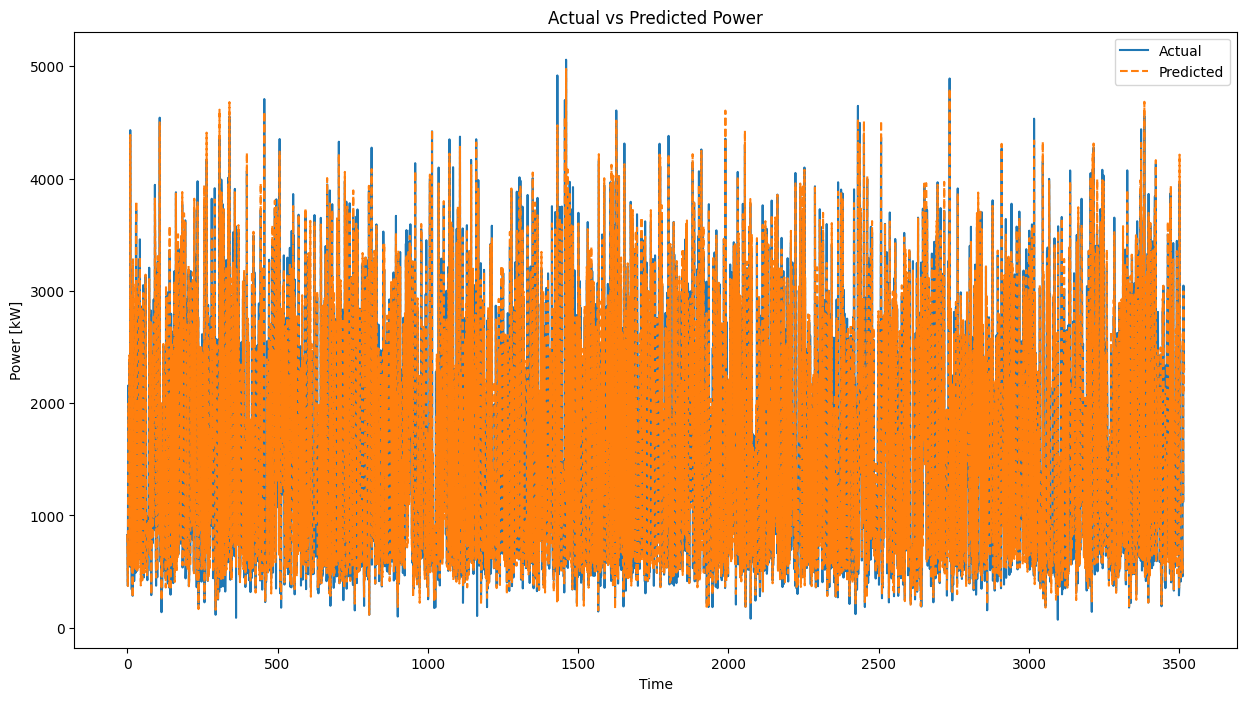

In [ ]:
# Get the best model used for prediction
best_model = predictor.get_model_best()
print(f"Best model used for prediction: {best_model}")

# Inspect the leaderboard
leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard)

# Make predictions on test data
predictions = predictor.predict(X_test)

# Prepare the DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

# Reset index to have a proper x-axis if needed
plot_df = plot_df.reset_index(drop=True)

# Plotting the time series
plt.figure(figsize=(15, 8))
plt.plot(plot_df['Actual'], label='Actual')
plt.plot(plot_df['Predicted'], label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Power [kW]')
plt.title('Actual vs Predicted Power')
plt.legend()
plt.show()